# Projeto Final - Aprendizado de Máquinas I
# PES 03 - Professor George Darmiton da Cunha Cavalcanti

## Michele Beatriz Lopes Farias
## Rafael Couto de Oliveira
---

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

# 1.0 Carregando dados

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv


Ela classifica o preço de telefones celulares como: low cost, medium cost, high cost e very high cost de acordo com algumas características de cada aparelho

Dados disponiveis em duas amostras: Treino e teste..

In [2]:
df= pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

# 2.0 Pre processamento dos dados

## 2.1 Tamanho dos dados

In [3]:
print (f'Número de linhas: {df.shape[0]}')
print (f'Número de colunas: {df.shape[1]}')

Número de linhas: 2000
Número de colunas: 21


## 2.2 Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2.3 Verificação de valores nulos

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Ajuste das colunas

### 2.4.1 Renomeando as colunas

Battery_power : capacity in mAh


blue : Has bluetooth or not


clock_speed : speed at which microprocessor executes instructions


dual_sim : Has dual sim support or not


fc : Front Camera mega pixels

four_g : Is 4g or not

int_memory : Internal Memory in Gigabytes

m_dep : mob depth in cms

mobile_wt : weight of phone in gms

n_cores : Number of cores of processor

pc : primary camera megapixels

px_height : pixel resolution height

px_width : pixel resolution width

ram : capacity

sc_h : screen height

sc_w : screen width

talk_time : in hrs

three_g : Is 3g or not

touch_screen : is touch screen or not

wifi : has wifi or not
price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). **

### 2.4.2 Ajustando tipo das colunas

In [7]:
# Converter colunas para booleano
colunas_bool = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[colunas_bool] = df[colunas_bool].astype('boolean')

# Converter coluna 'price_range' para categoria
df['price_range'] = df['price_range'].astype('category')

## 2.6 Feature Engineering

In [8]:
df['camera_px'] =  df['fc'] + df['pc']

# 3.0 Descrição dos dados

In [9]:
# Ajustar a configuração de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,camera_px
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,14.226000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,9.463916
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,7.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,14.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,21.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,39.000000


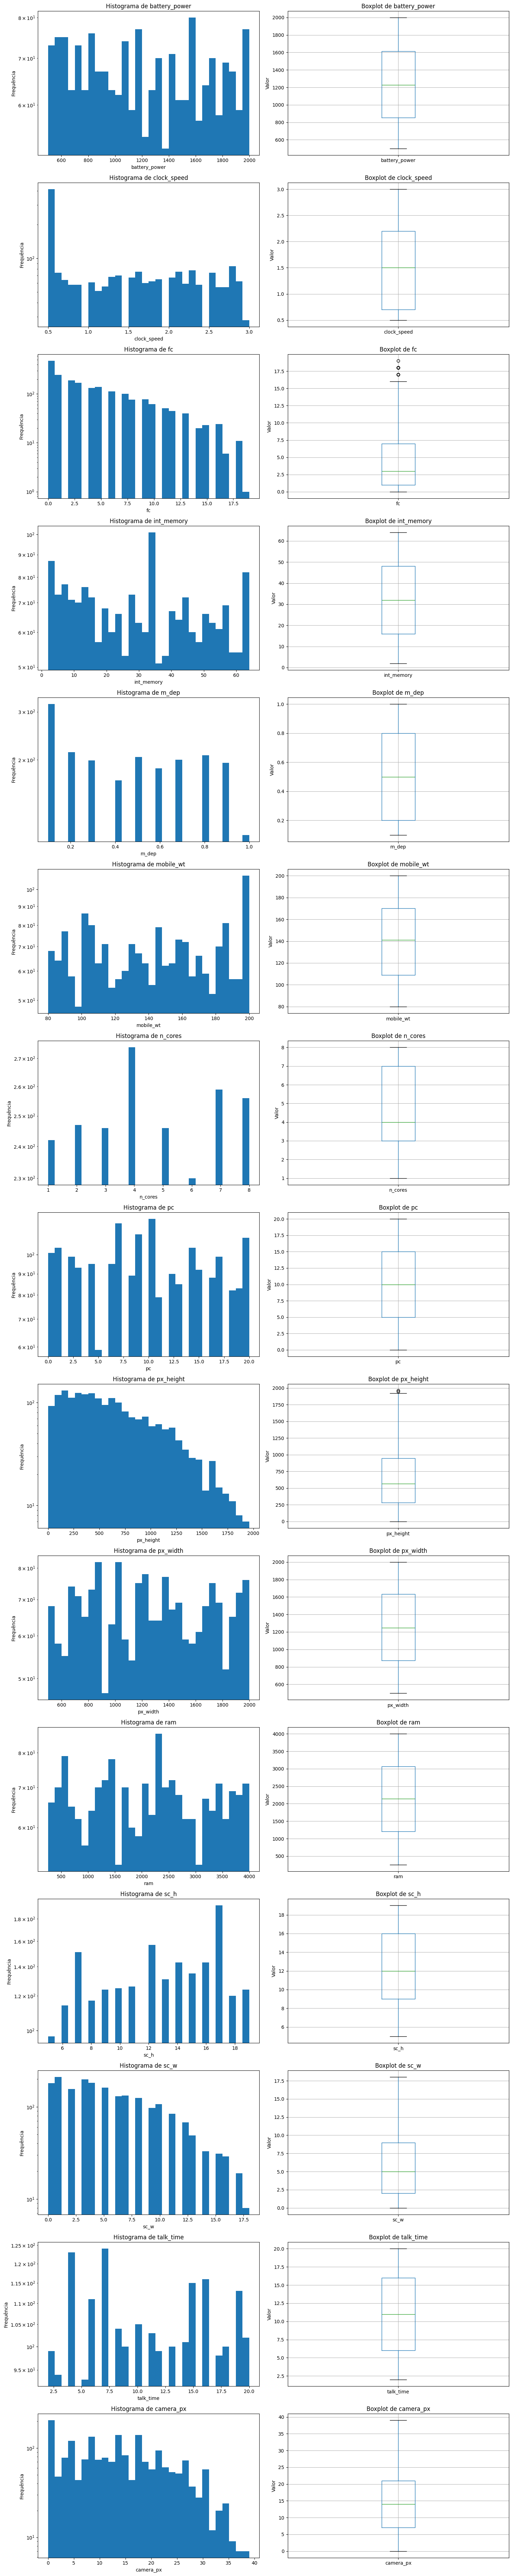

In [10]:
# Selecionando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, ncols=2, figsize=(15, 5*nlinhas))


# Plotar um histograma e boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    #plot do histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}', log=True)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequência')
    
    # Plotar o boxplot
    ax_box = axes[i, 1]
    df.boxplot(column=col, ax=ax_box)
    ax_box.set_title(f'Boxplot de {col}')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Valor')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.2 Dados categóricos

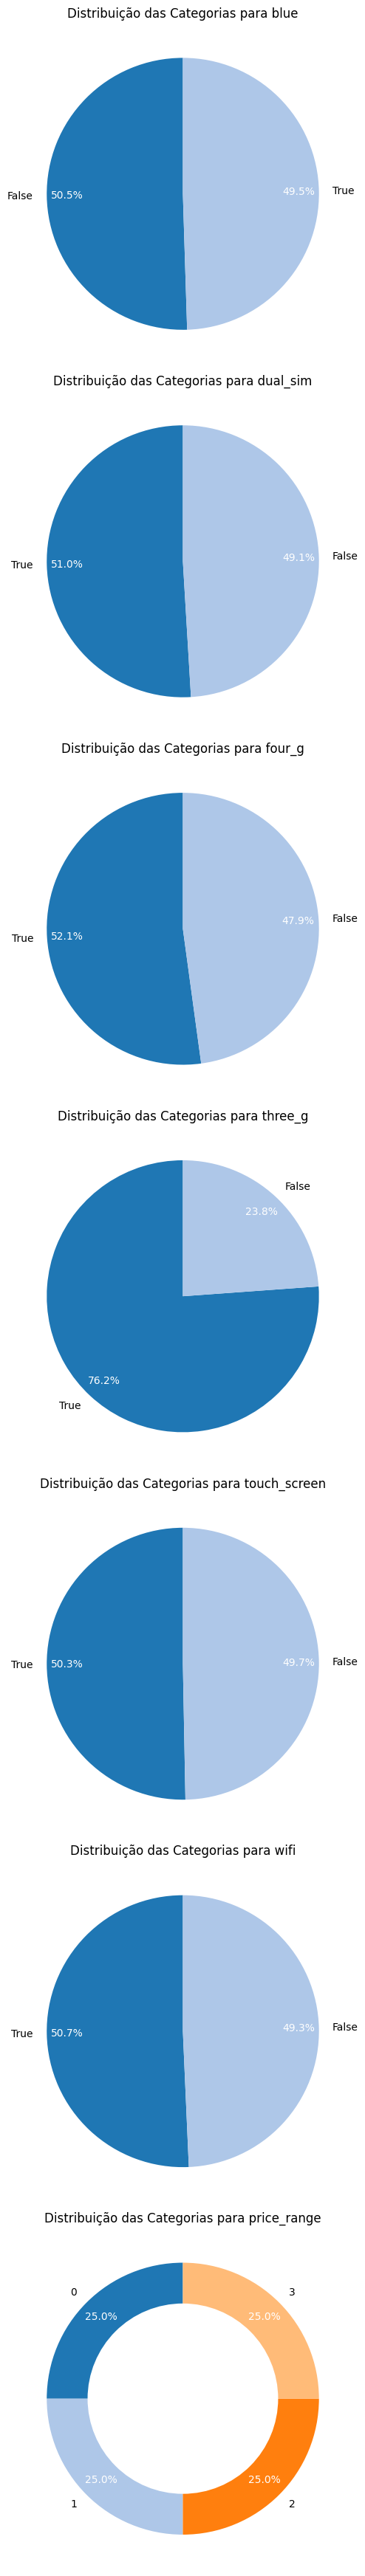

In [11]:
# Selecionando apenas as colunas categóricas
colunas_categoricas = df.select_dtypes(include=['bool', 'category']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_categoricas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, figsize=(15, 5*nlinhas))


# Plotar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    value_counts = df[col].value_counts()
    sizes = value_counts.values
    labels = value_counts.index

    # Gráfico de Pizza
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('tab20').colors  # Usando uma colormap para cores variadas
    )

    # Adicionar valores diretamente nas fatias
    for text in autotexts:
        text.set_color('white')

    # Adicionar um círculo branco no centro para um visual de donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(f'Distribuição das Categorias para {col}')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.3  Correlação entre os dados

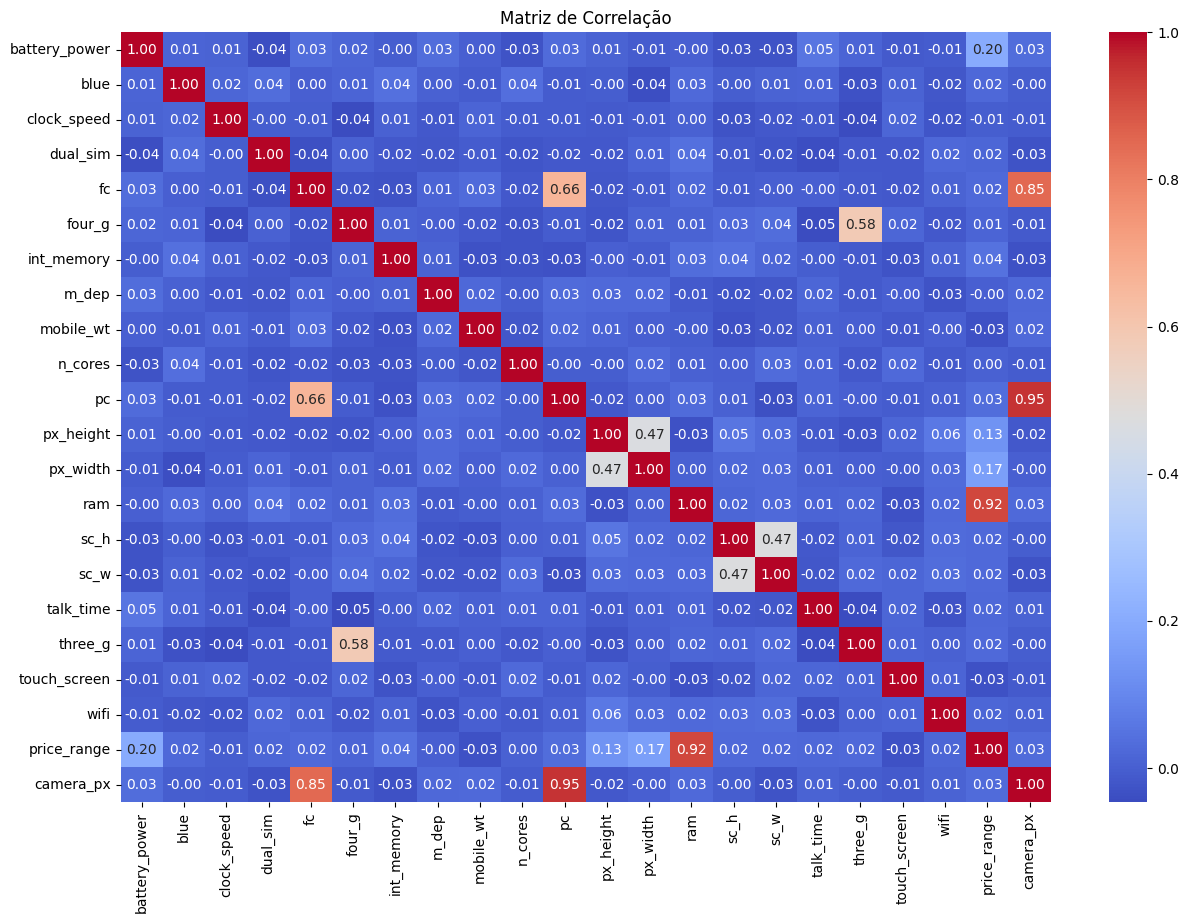

In [12]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(method='spearman')

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## 3.4  Distribuição por target



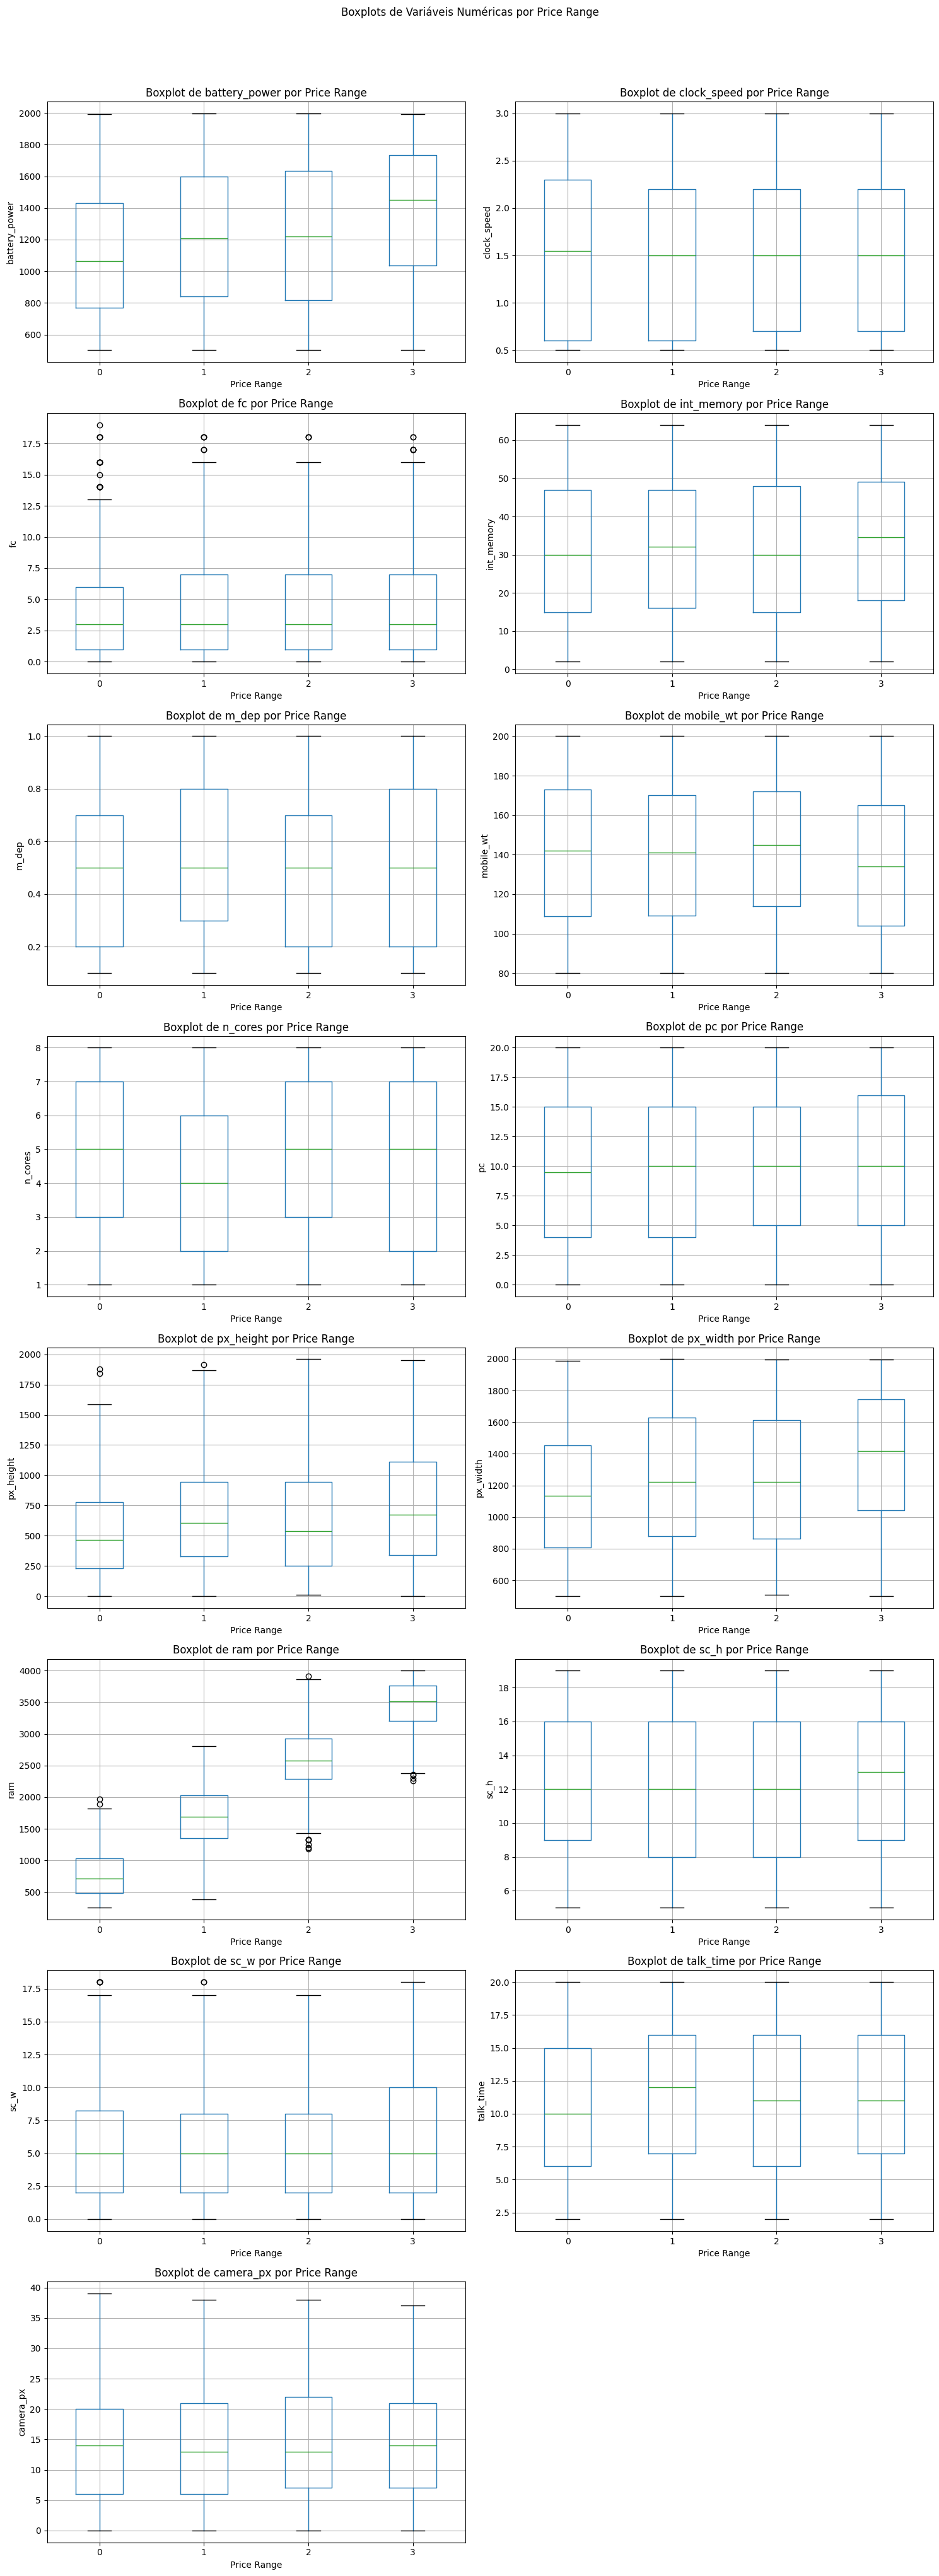

In [13]:
## plotar boxplot dos 4 targets por coluna
# Selecionar apenas as colunas numéricas (excluindo 'price_range')
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calculando o número de linhas para o grid de subplots
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas+1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    df.boxplot(column=col, by='price_range', ax=ax)
    ax.set_title(f'Boxplot de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(col)

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Boxplots de Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

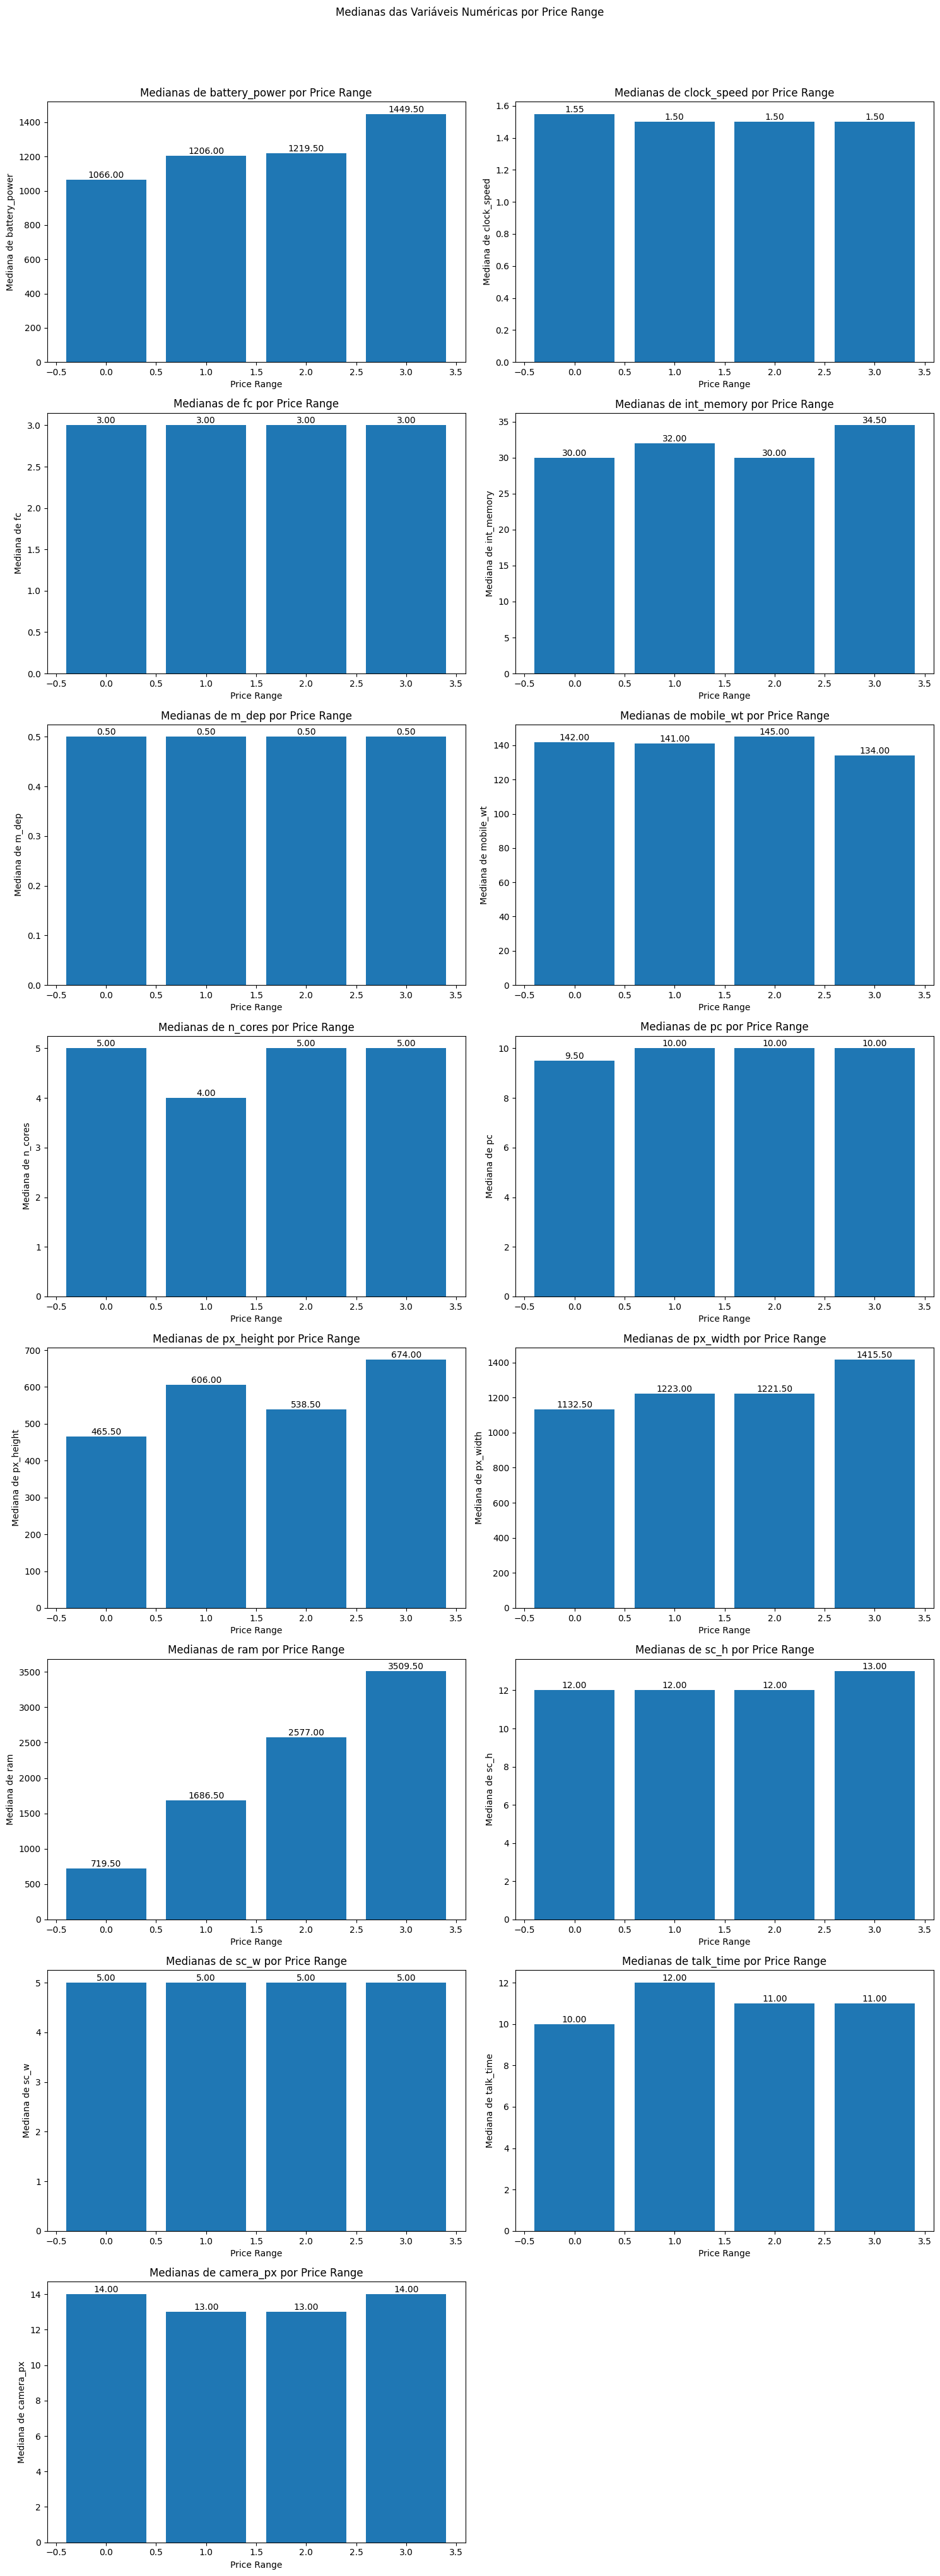

In [14]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas + 1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar gráficos de barras para as medianas de cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    
    # Calcular medianas por price_range
    medians = df.groupby('price_range', observed=False)[col].median().reset_index()
    
    # Plotar gráfico de barras
    ax.bar(medians['price_range'], medians[col])
    ax.set_title(f'Medianas de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(f'Mediana de {col}')
    
    # Adicionar valores nas barras
    for j, value in enumerate(medians[col]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Medianas das Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

# 4.0 Preparação dos dados

In [15]:
df1 = df.copy()

## 4.1 Rescaling

In [16]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'camera_px'],
      dtype='object')

In [17]:
rs = RobustScaler()
mms = MinMaxScaler()

# Para variáveis que apresentaram outliers vamos usar o RobustScaler
df1['fc'] = rs.fit_transform( df1[['fc']].values )
df1['px_height'	] = rs.fit_transform( df1[['px_height'	]].values )

# Para variáveis que não apresentaram outliers vamos usar o MinMacscaler
df1['battery_power'] = mms.fit_transform( df1[['battery_power']].values )
df1['clock_speed'] = mms.fit_transform(df1[['clock_speed']].values)
df1['int_memory'] = mms.fit_transform(df1[['int_memory']].values)
df1['m_dep'] = mms.fit_transform(df1[['m_dep']].values)
df1['mobile_wt'] = mms.fit_transform(df1[['mobile_wt']].values)
df1['n_cores'] = mms.fit_transform(df1[['n_cores']].values)
df1['pc'] = mms.fit_transform(df1[['pc']].values)
df1['px_width'] = mms.fit_transform(df1[['px_width']].values)
df1['ram'] = mms.fit_transform(df1[['ram']].values)
df1['sc_h'] = mms.fit_transform(df1[['sc_h']].values)
df1['sc_w'] = mms.fit_transform(df1[['sc_w']].values)
df1['talk_time'] = mms.fit_transform(df1[['talk_time']].values)
df1['camera_px'] = mms.fit_transform(df1[['camera_px']].values)



In [18]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,camera_px
0,0.227789,False,0.68,False,-0.333333,False,0.080645,0.555556,0.900000,0.142857,0.10,-0.818661,0.170895,0.612774,0.285714,0.388889,0.944444,False,False,True,1,0.076923
1,0.347361,True,0.00,True,-0.500000,True,0.822581,0.666667,0.466667,0.285714,0.30,0.513168,0.993324,0.634687,0.857143,0.166667,0.277778,True,True,False,2,0.153846
2,0.041416,True,0.00,True,-0.166667,True,0.629032,0.888889,0.541667,0.571429,0.30,1.051919,0.811749,0.627205,0.428571,0.111111,0.388889,True,True,False,2,0.205128
3,0.076152,True,0.80,False,-0.500000,False,0.129032,0.777778,0.425000,0.714286,0.45,0.981189,0.858478,0.671566,0.785714,0.444444,0.500000,True,False,False,2,0.230769
4,0.881764,True,0.28,False,1.666667,True,0.677419,0.555556,0.508333,0.142857,0.70,0.969150,0.475300,0.308658,0.214286,0.111111,0.722222,True,True,False,1,0.692308


# 5.0 Feature Selection

## 5.1 Eliminando variaveis sem muita correlação com a variavel resposta

In [19]:
df2 = df1[['battery_power', 'int_memory','mobile_wt','pc', 'px_height', 'px_width', 'ram','touch_screen','sc_w','price_range','camera_px']]

## 5.2 Definição das variaveis X e y

In [20]:
# Armazenando a variável alvoem X e os atributos em y
X = df2.drop('price_range', axis=1)
y = df2['price_range']

# Configurar KFold para 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## 5.3 Definindo dados de treino e teste

In [21]:
#Separando o conjunto de dados em treino+valição e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2['price_range'])


# 6.0 Machine Learning Modelling

In [22]:
def ml_fit(model, param_grid):
    # Armazenar os resultados
    results = []
    
    # Configurar o GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)
    
    # Ajustar o modelo usando GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Iterar por todas as combinações de parâmetros testadas
    for i in range(len(grid_search.cv_results_['params'])):
        params = grid_search.cv_results_['params'][i]
        
        # Armazenar as métricas para cada combinação de parâmetros
        roc_auc_scores = []
        f1_scores = []
        accuracy_scores = []
        conf_matrices = []
        
        # Validar cruzado e calcular as métricas
        for train_index, test_index in kfold.split(X_train, y_train):
            X_training, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
            y_training, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
            
            model.set_params(**params)
            model.fit(X_training, y_training)
            y_pred = model.predict(X_val)
            y_proba = model.predict_proba(X_val)
            
            # Binarizar as classes
            y_val_bin = label_binarize(y_val, classes=np.unique(y))
            
            # Garantir que y_proba tenha a forma correta
            if y_proba.ndim == 1:
                # Se y_proba é unidimensional, binarizar manualmente
                y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
            else:
                y_proba_bin = y_proba
            
            # Calcular o ROC AUC para problemas multiclasse
            roc_auc_scores.append(roc_auc_score(y_val_bin, y_proba_bin, average='macro', multi_class='ovr'))
            f1_scores.append(f1_score(y_val, y_pred, average='weighted'))
            accuracy_scores.append(accuracy_score(y_val, y_pred))
            conf_matrices.append(confusion_matrix(y_val, y_pred))

        # Calcular a média e o desvio padrão das métricas
        mean_roc_auc = np.mean(roc_auc_scores)
        std_roc_auc = np.std(roc_auc_scores)
        mean_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        mean_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)
        
        # Adicionar resultados à lista
        results.append({
            'Params': params,
            'Mean ROC AUC': mean_roc_auc,
            'Std ROC AUC': std_roc_auc,
            'Mean F1 Score': mean_f1,
            'Std F1 Score': std_f1,
            'Mean Accuracy': mean_accuracy,
            'Std Accuracy': std_accuracy
        })
    
    return results

## 6.1 KNN model

In [23]:
# Armazenar resultados
results = []
# Definir o modelo
knn = KNeighborsClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13,14, 15,16, 17, 19, 21,50,100,200],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

# Chamar a função ml_fit
results = ml_fit(knn, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df


,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,"{'metric': 'euclidean', 'n_neighbors': 3}",0.820867,0.021923,0.583171,0.039162,0.580000,0.039111
1,"{'metric': 'euclidean', 'n_neighbors': 5}",0.845166,0.017325,0.618228,0.036450,0.613750,0.038099
2,"{'metric': 'euclidean', 'n_neighbors': 7}",0.852568,0.012976,0.626973,0.025164,0.623750,0.026634
3,"{'metric': 'euclidean', 'n_neighbors': 9}",0.854684,0.012482,0.635786,0.027792,0.633125,0.027958
4,"{'metric': 'euclidean', 'n_neighbors': 11}",0.852899,0.010018,0.628078,0.018725,0.624375,0.019655
5,"{'metric': 'euclidean', 'n_neighbors': 13}",0.856129,0.009148,0.629479,0.021316,0.626250,0.024012
6,"{'metric': 'euclidean', 'n_neighbors': 14}",0.858447,0.010765,0.639644,0.022912,0.637500,0.023552
7,"{'metric': 'euclidean', 'n_neighbors': 15}",0.859779,0.013043,0.637243,0.027921,0.633750,0.029208
8,"{'metric': 'euclidean', 'n_neighbors': 16}",0.859457,0.013464,0.637640,0.038433,0.634375,0.037422
9,"{'metric': 'euclidean', 'n_neighbors': 17}",0.860907,0.012543,0.641813,0.031803,0.638750,0.032572


In [24]:
results_df[results_df['Mean ROC AUC']>0.75]

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,"{'metric': 'euclidean', 'n_neighbors': 3}",0.820867,0.021923,0.583171,0.039162,0.580000,0.039111
1,"{'metric': 'euclidean', 'n_neighbors': 5}",0.845166,0.017325,0.618228,0.036450,0.613750,0.038099
2,"{'metric': 'euclidean', 'n_neighbors': 7}",0.852568,0.012976,0.626973,0.025164,0.623750,0.026634
3,"{'metric': 'euclidean', 'n_neighbors': 9}",0.854684,0.012482,0.635786,0.027792,0.633125,0.027958
4,"{'metric': 'euclidean', 'n_neighbors': 11}",0.852899,0.010018,0.628078,0.018725,0.624375,0.019655
5,"{'metric': 'euclidean', 'n_neighbors': 13}",0.856129,0.009148,0.629479,0.021316,0.626250,0.024012
6,"{'metric': 'euclidean', 'n_neighbors': 14}",0.858447,0.010765,0.639644,0.022912,0.637500,0.023552
7,"{'metric': 'euclidean', 'n_neighbors': 15}",0.859779,0.013043,0.637243,0.027921,0.633750,0.029208
8,"{'metric': 'euclidean', 'n_neighbors': 16}",0.859457,0.013464,0.637640,0.038433,0.634375,0.037422
9,"{'metric': 'euclidean', 'n_neighbors': 17}",0.860907,0.012543,0.641813,0.031803,0.638750,0.032572


<Axes: xlabel='Params'>

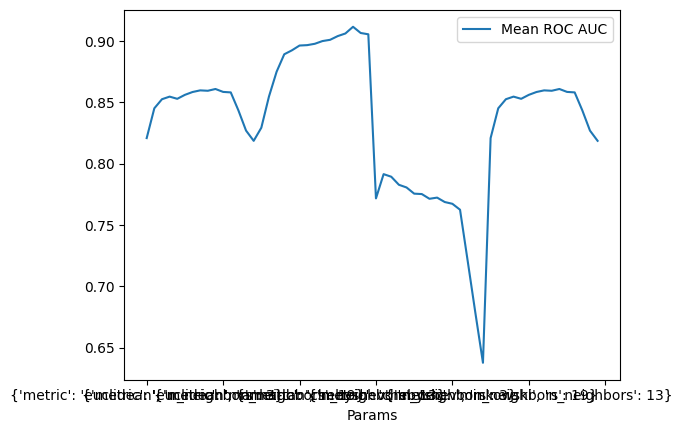

In [25]:
results_df[results_df['Mean ROC AUC']>0].plot(x='Params',y='Mean ROC AUC')

#### Melhorias

Ajuste de Hiperparâmetros: Experimentar outras métricas de distância.


Feature Engineering: Criar novas features ou selecionar as mais relevantes pode melhorar o desempenho do modelo.


#### Plotar matriz de confusão para o melhor caso k=300

## 6.2 DecisionTreeClassifier

In [26]:
# Armazenar resultados
results = []

# Definir o modelo
dt = DecisionTreeClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}

# Chamar a função ml_fit
results = ml_fit(dt, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,{'max_depth': 1},0.775086,0.013236,0.335559,0.046236,0.500000,0.041926
1,{'max_depth': 2},0.887495,0.015263,0.748666,0.036187,0.746875,0.036577
2,{'max_depth': 3},0.918930,0.014902,0.741535,0.050856,0.742500,0.047004
3,{'max_depth': 4},0.943968,0.013341,0.794938,0.032591,0.795625,0.030752
4,{'max_depth': 5},0.951067,0.008935,0.819792,0.024242,0.818750,0.024206
5,{'max_depth': 6},0.939820,0.014454,0.835394,0.022401,0.835000,0.022396
6,{'max_depth': 7},0.914243,0.021499,0.830872,0.023590,0.830000,0.024012
7,{'max_depth': 8},0.895051,0.017622,0.826726,0.020911,0.826250,0.020879
8,{'max_depth': 9},0.891042,0.015415,0.829168,0.019744,0.828750,0.019804
9,{'max_depth': 10},0.886366,0.010854,0.827787,0.017446,0.827500,0.017500


In [27]:
results_df[results_df['Mean ROC AUC']>0.945]

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
4,{'max_depth': 5},0.951067,0.008935,0.819792,0.024242,0.81875,0.024206


#### Melhorias

Ajuste de Hiperparâmetros: Experimentar outras min_samples_split, min_samples_leaf, max_features. FFazer random search????


Feature Engineering: Utilize métodos como Recursive Feature Elimination (RFE) ou análise de importância de features para selecionar as mais relevantes.


#### Plotar matriz de confusão para o melhor caso max_depth = 5



## 6.3  MLPClassifier

In [28]:
# Armazenar resultados
results = []

# Definir o modelo
mlp = MLPClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'hidden_layer_sizes': [(3,),(5,),(7,),(10,), (50,), (100,), (150,), (200,),(500,)],
    'activation':['identity','logistic'],
    'max_iter': [2000],
}

# Chamar a função ml_fit
results = ml_fit(mlp, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df

c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,"{'activation': 'identity', 'hidden_layer_sizes...",0.999016,0.000761,0.969358,0.014717,0.969375,0.014644
1,"{'activation': 'identity', 'hidden_layer_sizes...",0.998984,0.000761,0.969316,0.012778,0.969375,0.012640
2,"{'activation': 'identity', 'hidden_layer_sizes...",0.999037,0.000720,0.969336,0.014198,0.969375,0.014101
3,"{'activation': 'identity', 'hidden_layer_sizes...",0.999111,0.000726,0.971824,0.012312,0.971875,0.012263
4,"{'activation': 'identity', 'hidden_layer_sizes...",0.998995,0.000723,0.966815,0.014850,0.966875,0.014803
5,"{'activation': 'identity', 'hidden_layer_sizes...",0.999162,0.000647,0.972423,0.010991,0.972500,0.010897
6,"{'activation': 'identity', 'hidden_layer_sizes...",0.999106,0.000729,0.971832,0.014385,0.971875,0.014321
7,"{'activation': 'identity', 'hidden_layer_sizes...",0.999060,0.000699,0.968104,0.012950,0.968125,0.012945
8,"{'activation': 'identity', 'hidden_layer_sizes...",0.998803,0.000856,0.971226,0.015643,0.971250,0.015612
9,"{'activation': 'logistic', 'hidden_layer_sizes...",0.998525,0.000798,0.959058,0.008654,0.959375,0.008501


## 6.4 GaussianNB

In [29]:
# Armazenar resultados
results = []

# Definir o modelo
gnb = GaussianNB()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

# Chamar a função ml_fit
results = ml_fit(gnb, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,{'var_smoothing': 1e-09},0.951658,0.009505,0.79983,0.030912,0.799375,0.03042
1,{'var_smoothing': 1e-08},0.951658,0.009505,0.79983,0.030912,0.799375,0.03042
2,{'var_smoothing': 1e-07},0.951658,0.009505,0.79983,0.030912,0.799375,0.03042
3,{'var_smoothing': 1e-06},0.951658,0.009505,0.79983,0.030912,0.799375,0.03042
4,{'var_smoothing': 1e-05},0.951664,0.009500,0.79983,0.030912,0.799375,0.03042


## 6.5 SVM

In [30]:

# Armazenar resultados
results = []

# Definir o modelo
svc = SVC()

# Definir o grid de parâmetros a ser testado
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'probability': [True],
#}

# escolhendo a lista de combinações para usar o no gridsearch 
param_grid = {
    "kernel": ['linear', 'rbf'],  # Remover 'poly' se não for crucial
    "C": [0.1, 1, 10],            # Menor número de valores
    "gamma": [0.01, 0.1, 1],      # Menor número de valores
    'probability': [True],
}


# Chamar a função ml_fit
results = ml_fit(svc, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', ...",0.994058,0.002644,0.926720,0.018077,0.926250,0.018286
1,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'pr...",0.765047,0.049140,0.098552,0.047098,0.232500,0.045139
2,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.994094,0.002645,0.926720,0.018077,0.926250,0.018286
3,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'pro...",0.891251,0.011635,0.555893,0.065601,0.569375,0.058058
4,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",0.994084,0.002683,0.926720,0.018077,0.926250,0.018286
5,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'proba...",0.934364,0.010525,0.723349,0.030261,0.718125,0.029242
6,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear', 'p...",0.997681,0.000999,0.953042,0.012549,0.953125,0.012578
7,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'prob...",0.902198,0.010580,0.613868,0.057282,0.619375,0.047224
8,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'pr...",0.997668,0.000997,0.953042,0.012549,0.953125,0.012578
9,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'proba...",0.994265,0.001772,0.926617,0.015155,0.926250,0.015258


## 6.6 Random Forest

In [31]:

# Armazenar resultados
results = []

# Definir o modelo
rf = RandomForestClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'n_estimators': [10, 100, 250],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}

# Chamar a função ml_fit
results = ml_fit(rf, param_grid)

results_df = pd.DataFrame(results)
# Printar os resultados
results_df

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy
0,"{'max_depth': 1, 'n_estimators': 10}",0.814548,0.046459,0.505941,0.065765,0.558750,0.040039
1,"{'max_depth': 1, 'n_estimators': 100}",0.841689,0.018373,0.467918,0.106392,0.553125,0.069723
2,"{'max_depth': 1, 'n_estimators': 250}",0.846934,0.020384,0.475402,0.104317,0.563750,0.069810
3,"{'max_depth': 2, 'n_estimators': 10}",0.876598,0.031241,0.638895,0.101931,0.656875,0.082132
4,"{'max_depth': 2, 'n_estimators': 100}",0.929512,0.015348,0.753142,0.065945,0.767500,0.056995
5,"{'max_depth': 2, 'n_estimators': 250}",0.932078,0.011966,0.759793,0.064219,0.775000,0.056527
6,"{'max_depth': 3, 'n_estimators': 10}",0.925741,0.013686,0.756758,0.037366,0.761250,0.035663
7,"{'max_depth': 3, 'n_estimators': 100}",0.949399,0.011433,0.800436,0.036716,0.807500,0.034210
8,"{'max_depth': 3, 'n_estimators': 250}",0.951865,0.011636,0.801048,0.039882,0.807500,0.038099
9,"{'max_depth': 4, 'n_estimators': 10}",0.948140,0.011328,0.797883,0.031156,0.801875,0.031131


# 7.0 Matriz de confusão e metricas

## 7.1 Função Geral Matriz de Confusão

In [61]:
def generate_confusion_matrix(model, params, X_train, X_test, y_train, y_test):

     # Ajustar o modelo com os parâmetros fornecidos
    model.set_params(**params)
    #Treinar o modelo
    model.fit(X_train, y_train)

     # Predizer resultados
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)
        
    # Calcular a matriz de confusão para esta divisão
    conf_matrix_train = confusion_matrix(y_train, y_pred, labels=np.unique(y))
    conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=np.unique(y))
    
    #plotar a matriz
    class_names = np.unique(y_train).astype(str)
    
     # Plotar matrizes de confusão
    plot_confusion_matrix(conf_matrix_train, class_names, 'Confusion Matrix - Train')
    plot_confusion_matrix(conf_matrix_test, class_names, 'Confusion Matrix - Test')
    
    # Calcular e imprimir métricas
    print('Training Metrics:')
    print('F1 Score:', f1_score(y_train, y_pred, average='weighted'))
    print('Accuracy:', accuracy_score(y_train, y_pred))
    
    print('Test Metrics:')
    print('F1 Score:', f1_score(y_test, y_pred_test, average='weighted'))
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print('Accuracy:', test_accuracy)
    
    return test_accuracy

def plot_confusion_matrix(conf_matrix, class_names, title):
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.title(title)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(conf_matrix[i, j], '.2f'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
    
    plt.show()


## 7.2 KNN

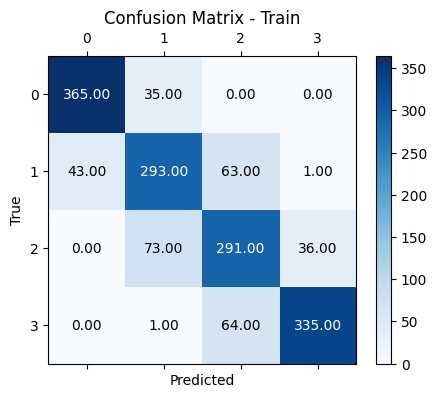

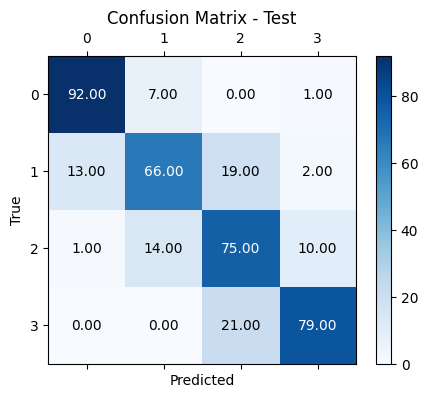

Training Metrics:
F1 Score: 0.8033764383635159


TypeError: 'tuple' object is not callable

In [62]:
# Definir o modelo
knn = KNeighborsClassifier()

# Definir os parâmetros do modelo
params = {'metric': 'manhattan', 'n_neighbors': 50}

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(knn, params, X_train, X_test, y_train, y_test)


# classifiers é uma lista de tuplas (nome, classificador, acurácia)
classifiers = [
    ("KNeighborsClassifier", knn, accuracy_score)
]

X_plot = X.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(15, 10))
plot_decision_regions(X_plot, y_test.values, knn, "KNeighborsClassifier", accuracy, X_train_mean)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 7.3 Arvore de decisão

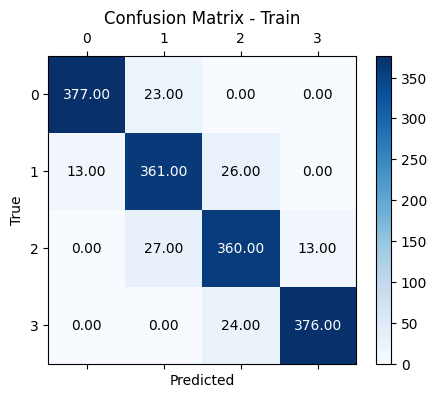

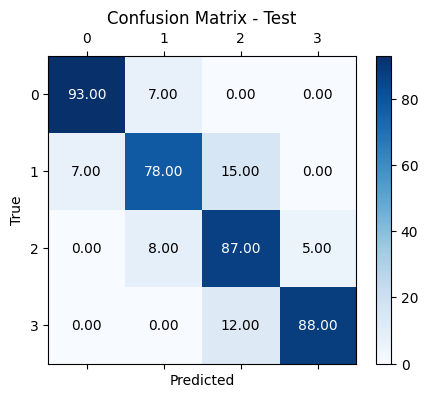

Training Metrics:
F1 Score: 0.9216708511669232
Accuracy: 0.92125
Test Metrics:
F1 Score: 0.8658228415088857
Accuracy: 0.865


(array([[377,  23,   0,   0],
        [ 13, 361,  26,   0],
        [  0,  27, 360,  13],
        [  0,   0,  24, 376]], dtype=int64),
 array([[93,  7,  0,  0],
        [ 7, 78, 15,  0],
        [ 0,  8, 87,  5],
        [ 0,  0, 12, 88]], dtype=int64))

In [43]:
# Definir o modelo
dt = DecisionTreeClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 6}	
# Explicação escolha parâmetro
# apesar da matriz ROC o melhor resultado tenha sido para max_depth =5
# max_depth =6 também apresentou um valor alto na matriz ROC e sua acurácia foi mais elevada, o que justificou sua escolha
# Chamar a função generate_confusion_matrix
conf_matrix_mean = generate_confusion_matrix(dt, params, X_train, X_test, y_train, y_test)
conf_matrix_mean

## 7.4 MLP

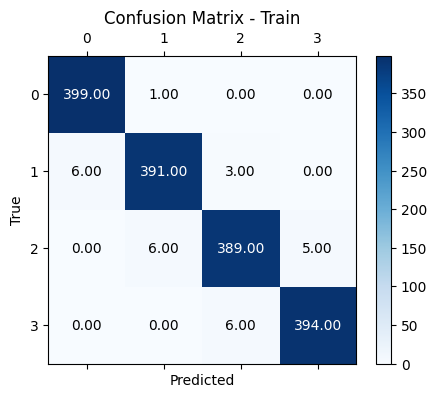

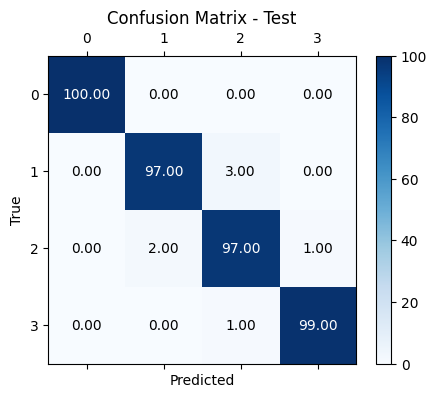

Training Metrics:
F1 Score: 0.9831060892149839
Accuracy: 0.983125
Test Metrics:
F1 Score: 0.9825121253031326
Accuracy: 0.9825


(array([[399,   1,   0,   0],
        [  6, 391,   3,   0],
        [  0,   6, 389,   5],
        [  0,   0,   6, 394]], dtype=int64),
 array([[100,   0,   0,   0],
        [  0,  97,   3,   0],
        [  0,   2,  97,   1],
        [  0,   0,   1,  99]], dtype=int64))

In [44]:
# Definir o modelo
mlp = MLPClassifier()

# Definir os parâmetros do modelo
params = {
    'activation':'identity', 'hidden_layer_sizes':(10,), 'max_iter':2000
}
#Explicação escolha parâmetros
#Todos os resultados na matriz ROC foram em torno de 99% 
#Olhamos também para acurácia para bater o martelo
# Dessa forma o parâmetro escolhido foi o que teve a maior acurácia (97%), no  mais baixo custo computacional

# Chamar a função generate_confusion_matrix
conf_matrix_mean = generate_confusion_matrix(mlp, params, X_train, X_test, y_train, y_test)
conf_matrix_mean

## 7.5 Nayve Bayes

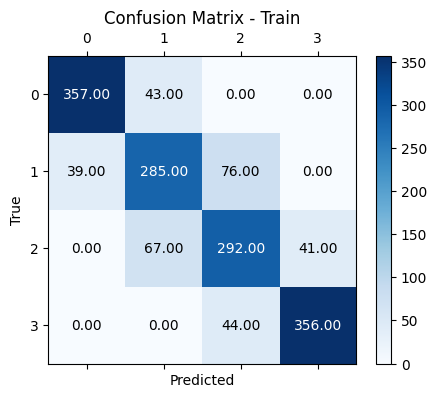

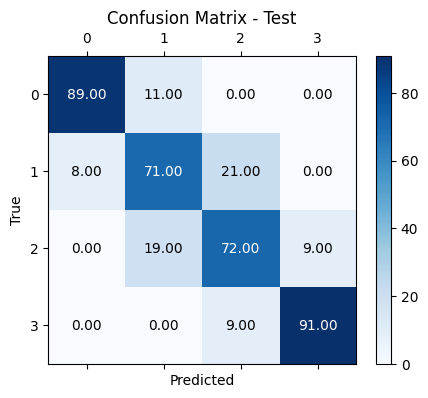

Training Metrics:
F1 Score: 0.8066319855234858
Accuracy: 0.80625
Test Metrics:
F1 Score: 0.8082230620781603
Accuracy: 0.8075


(array([[357,  43,   0,   0],
        [ 39, 285,  76,   0],
        [  0,  67, 292,  41],
        [  0,   0,  44, 356]], dtype=int64),
 array([[89, 11,  0,  0],
        [ 8, 71, 21,  0],
        [ 0, 19, 72,  9],
        [ 0,  0,  9, 91]], dtype=int64))

In [46]:
# Definir o modelo
gnb = GaussianNB()

# Definir os parâmetros do modelo
params = {'var_smoothing': 1e-05}	

# Explicação escolha parâmetro
# Não houve diferença na performance com a variação do parâmetro, escolhido de forma aleatória

# Chamar a função generate_confusion_matrix
conf_matrix_mean = generate_confusion_matrix(gnb, params, X_train, X_test, y_train, y_test)
conf_matrix_mean

## 7.6 SVM

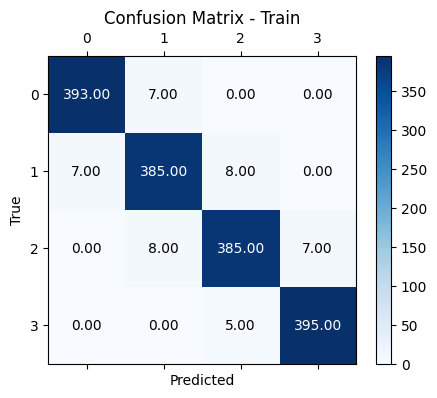

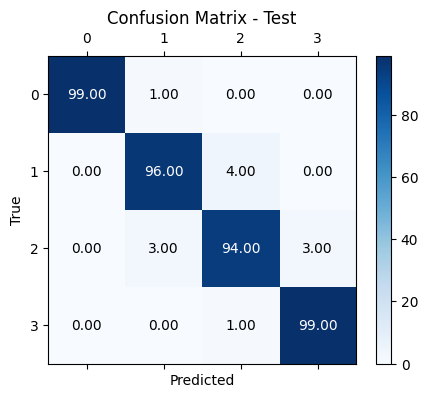

Training Metrics:
F1 Score: 0.9737374217963862
Accuracy: 0.97375
Test Metrics:
F1 Score: 0.9699741280660729
Accuracy: 0.97


(array([[393,   7,   0,   0],
        [  7, 385,   8,   0],
        [  0,   8, 385,   7],
        [  0,   0,   5, 395]], dtype=int64),
 array([[99,  1,  0,  0],
        [ 0, 96,  4,  0],
        [ 0,  3, 94,  3],
        [ 0,  0,  1, 99]], dtype=int64))

In [47]:
# Definir o modelo
svm = SVC(probability=True)

# Definir os parâmetros do modelo
params = {
    'C': 10,
    'kernel': 'linear',
    'gamma': 0.01,
    'probability':True
}
# Explicação escolha parâmetros
# O parâmetro escolhido apresentou 99% na curva ROC e 96% na acurácia
# Os resultados mais elevados, comparado a os outros parâmetros testados

# Chamar a função generate_confusion_matrix
conf_matrix_mean = generate_confusion_matrix(svm, params, X_train, X_test, y_train, y_test)
conf_matrix_mean

## 7.7 Random Forest

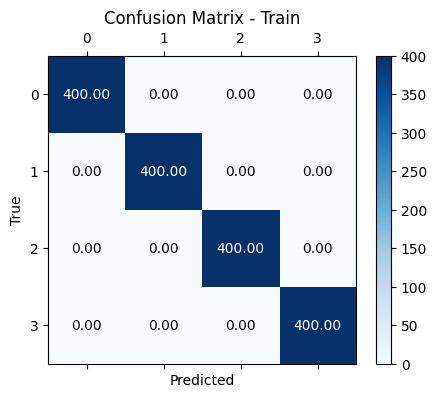

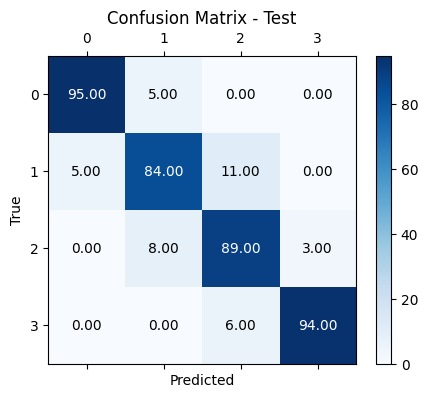

Training Metrics:
F1 Score: 1.0
Accuracy: 1.0
Test Metrics:
F1 Score: 0.905296067221921
Accuracy: 0.905


(array([[400,   0,   0,   0],
        [  0, 400,   0,   0],
        [  0,   0, 400,   0],
        [  0,   0,   0, 400]], dtype=int64),
 array([[95,  5,  0,  0],
        [ 5, 84, 11,  0],
        [ 0,  8, 89,  3],
        [ 0,  0,  6, 94]], dtype=int64))

In [48]:
# Definir o modelo
rf = RandomForestClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 11, 'n_estimators': 100}	

# Explicação escolha parâmetros
# Olhamos para o resultado da curva ROC (98%) e acurárcia (89%), os mais elavados que apareceram
# Tivemos também resultados nessa performance com o n_estimators=250
# Visto a performance parecida, fez sentido ficar com o n_estimators=100 que tem um menor custo computacional

# Chamar a função generate_confusion_matrix
conf_matrix_mean = generate_confusion_matrix(rf, params, X_train, X_test, y_train, y_test)
conf_matrix_mean

# 8 Região de decisão

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, title, accuracy, X_train_mean, resolution=0.02):
    feature1 = 0  # índice da primeira feature
    feature2 = 6  # índice da segunda feature
    # Calculando a média de cada feature no conjunto de treinamento
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Criando um grid de pontos
    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    
    # Ajuste para a predição usando todas as features
    X_full = np.tile(X_train_mean, (grid_points.shape[0], 1))
    X_full[:, feature1] = grid_points[:, 0]
    X_full[:, feature2] = grid_points[:, 1]
    
    Z = classifier.predict(X_full)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    
    plt.title(f'{title}\nTaxa de acerto: {accuracy:.2f}%')
    plt.xlabel(df2.columns[feature1])
    plt.ylabel(df2.columns[feature2])
    plt.legend(loc='upper left')
    plt.tight_layout()


In [ ]:

# Treinando modelos com todas as features
mlp = MLPClassifier(activation='identity', hidden_layer_sizes=(5,10), max_iter=2000)
mlp.fit(X_train, y_train)
mlp_acc = mlp.score(X_test, y_test) * 100

rf = RandomForestClassifier(max_depth=18, n_estimators=250)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test) * 100

svm = SVC(C=10,kernel='linear', gamma=0.01,probability=True)
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test) * 100

gnb = GaussianNB(var_smoothing=1e-05)
gnb.fit(X_train, y_train)
gnb_acc = gnb.score(X_test, y_test) * 100

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test) * 100

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=50)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test) * 100

In [ ]:
# classifiers é uma lista de tuplas (nome, classificador, acurácia)
classifiers = [
    ("MLP 100 neurônios na camada escondida | Levenberg-Marquardt", mlp, mlp_acc),
    ("DecisionTreeClassifier", dt, dt_acc),
    ("Random Forest Classifier", rf, rf_acc),
    ("Support Vector Machine com kernel Gaussiano", svm, svm_acc),
    ("GaussianNB", gnb, gnb_acc),
    ("KNeighborsClassifier", knn, knn_acc)
]

X_plot = X.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem

plt.figure(figsize=(30, 20))
for i, (name, classifier, accuracy) in enumerate(classifiers):
    plt.subplot(3, 2, i+1)
    plot_decision_regions(X_plot, y.values, classifier, name, accuracy)  # Ajuste para y.values se y for uma Series

plt.suptitle('Regiões de decisão geradas por diferentes modelos', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()